In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
config = 'simple_linear_high_utilisation'

slow_server_training = pd.read_csv(f'tmp/results_{config}.txt')

slow_server_SPT = pd.read_csv(f'results/ShortestProcessingTime_results_{config}.txt')
slow_server_SPT

,uncompleted_cases,Resource 1,Resource 2,total_reward,mean_cycle_time,std_cycle_time
0,25,0.998112,0.998420,-206705.170487,81.379988,370.139461
1,20,0.926699,0.935995,-41721.144847,17.211693,27.646127
2,6,0.956849,0.957074,-53729.237467,22.129010,58.188455
3,37,0.969557,0.971553,-101770.089983,40.756944,101.066242
4,4,0.977801,0.980054,-101792.314316,40.603237,139.191506
...,...,...,...,...,...,...
95,2,0.984818,0.983074,-113387.320559,45.210255,125.839075
96,16,0.992696,0.993778,-183073.609272,72.076224,233.988568
97,17,0.988786,0.990097,-166049.124845,65.528463,276.100035
98,76,0.995924,0.995193,-347270.728490,134.653249,449.612924


C:\Users\s144763\AppData\Local\Temp\ipykernel_20200\1130651168.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\s144763\AppData\Local\Temp\ipykernel_20200\1130651168.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\s144763\AppData\Local\Temp\ipykernel_20200\1130651168.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\s144763\AppData\Local\Temp\ipykernel_20200\1130651168.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


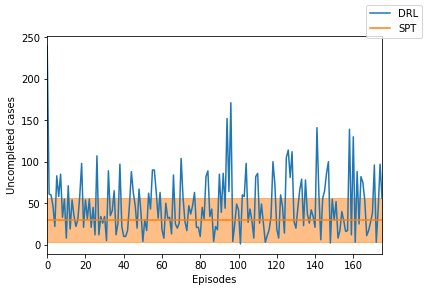

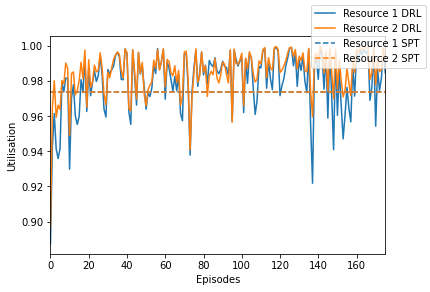

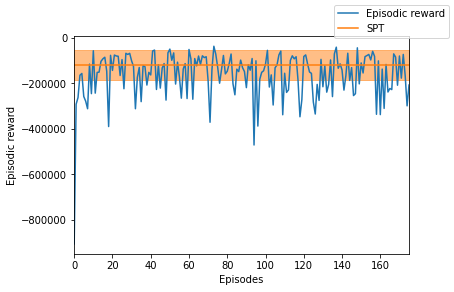

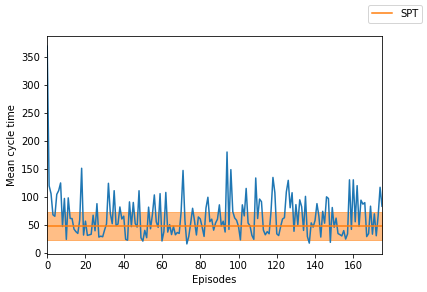

In [33]:
fig, ax = plt.subplots()

ax.plot(slow_server_training.index, slow_server_training['uncompleted_cases'], label='DRL')
uncompleted_cases = np.mean(slow_server_SPT['uncompleted_cases'])
uncompleted_cases_std = np.std(slow_server_SPT['uncompleted_cases'])
ax.axhline(uncompleted_cases, color='C1', label='SPT')
ax.fill_between(slow_server_training.index, [uncompleted_cases+uncompleted_cases_std for i in slow_server_training.index], [uncompleted_cases-uncompleted_cases_std for i in slow_server_training.index], alpha=0.5, color='C1')
ax.set_xlabel('Episodes')
ax.set_ylabel('Uncompleted cases')
ax.set_xlim(slow_server_training.index[0], slow_server_training.index[-1])
fig.legend()
fig.show()


fig, ax = plt.subplots()
ax.plot(slow_server_training.index, slow_server_training['Resource 1'], label='Resource 1 DRL', color='C0')
ax.plot(slow_server_training.index, slow_server_training['Resource 2'], label='Resource 2 DRL', color='C1')
utilisation_SPT = np.mean(slow_server_SPT['Resource 1'])
utilisation2_SPT = np.mean(slow_server_SPT['Resource 1'])
ax.axhline(utilisation_SPT, label='Resource 1 SPT', color='C0', linestyle='--')
ax.axhline(utilisation2_SPT, label='Resource 2 SPT', color='C1', linestyle='--')
ax.set_xlabel('Episodes')
ax.set_ylabel('Utilisation')
ax.set_xlim(slow_server_training.index[0], slow_server_training.index[-1])
fig.legend()
fig.show()


fig, ax = plt.subplots()
ax.plot(slow_server_training.index, slow_server_training['total_reward'], label='Episodic reward')
total_reward = np.mean(slow_server_SPT['total_reward'])
total_reward_std = np.std(slow_server_SPT['total_reward'])
ax.axhline(total_reward, color='C1', label='SPT')
ax.fill_between(slow_server_training.index, [total_reward+total_reward_std for i in slow_server_training.index], [total_reward-total_reward_std for i in slow_server_training.index], alpha=0.5, color='C1')
ax.set_xlabel('Episodes')
ax.set_ylabel('Episodic reward')
ax.set_xlim(slow_server_training.index[0], slow_server_training.index[-1])
fig.legend()
fig.show()


fig, ax = plt.subplots()
ax.plot(slow_server_training.index, slow_server_training['mean_cycle_time'])
mean_cycle = np.mean(slow_server_SPT['mean_cycle_time'])
mean_cycle_std = np.std(slow_server_SPT['mean_cycle_time'])
ax.axhline(mean_cycle, color='C1', label='SPT')
ax.fill_between(slow_server_training.index, [mean_cycle+mean_cycle_std for i in slow_server_training.index], [mean_cycle-mean_cycle_std for i in slow_server_training.index], alpha=0.5, color='C1')
ax.set_xlabel('Episodes')
ax.set_ylabel('Mean cycle time')
ax.set_xlim(slow_server_training.index[0], slow_server_training.index[-1])
fig.legend()
fig.show()

#ax2.plot(slow_server_training.index, slow_server_training.mean_cycle_time, color='C1', label='')